In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import datetime as dt
from pynse import *

In [3]:
nse = Nse()

In [4]:
nse.market_status()

{'marketState': [{'market': 'Capital Market',
   'marketStatus': 'Open',
   'tradeDate': '06-Sep-2021',
   'index': 'NIFTY 50',
   'last': 17395.7,
   'variation': 72.10000000000218,
   'percentChange': 0.42,
   'marketStatusMessage': 'Normal Market is Open'},
  {'market': 'Currency',
   'marketStatus': 'Open',
   'tradeDate': '06-Sep-2021',
   'index': '',
   'last': '',
   'variation': '',
   'percentChange': '',
   'marketStatusMessage': 'Market is Open'},
  {'market': 'Commodity',
   'marketStatus': 'Open',
   'tradeDate': '06-Sep-2021',
   'index': '',
   'last': '',
   'variation': '',
   'percentChange': '',
   'marketStatusMessage': 'Market is Open'},
  {'market': 'Debt',
   'marketStatus': 'Open',
   'tradeDate': '06-Sep-2021',
   'index': '',
   'last': '',
   'variation': '',
   'percentChange': '',
   'marketStatusMessage': 'Market is Open'}]}

# 1. RELIANCE

In [5]:
rel = nse.get_hist('RELIANCE',from_date = dt.datetime(2020,1,1),to_date = dt.datetime.now())
rel

,open,high,low,close,volume
Date,,,,,
2020-01-01,1518.0,1527.10,1505.50,1509.60,6402372
2020-01-02,1512.0,1540.95,1512.00,1535.30,8096561
2020-01-03,1533.0,1541.65,1523.00,1537.15,9593498
2020-01-06,1520.0,1527.90,1498.00,1501.50,11209343
2020-01-07,1519.0,1534.50,1513.50,1524.60,7627191
...,...,...,...,...,...
2021-08-30,2250.0,2275.85,2236.80,2270.25,6473487
2021-08-31,2276.9,2283.75,2242.25,2258.15,12223037
2021-09-01,2273.0,2292.90,2263.00,2267.10,5143640


In [6]:
def get_values(price,slow,fast,smooth):
    exp1 = price.ewm(span=fast, adjust=False).mean()
    exp2 = price.ewm(span=slow, adjust=False).mean()
    macd = exp1-exp2
    macd = pd.DataFrame(macd).rename(columns={'close':'macd'})
    signal = macd.ewm(span=smooth, adjust=False).mean()
    signal = pd.DataFrame(signal).rename(columns={'macd':'signal'})
    hist = macd['macd'] - signal['signal']
    hist = pd.DataFrame(hist).rename(columns={0:'hist'})
    df = pd.concat([macd,signal,hist],join='inner',axis=1)
    return df
df = get_values(rel['close'],26,12,9)
df

,macd,signal,hist
Date,,,
2020-01-01,0.000000,0.000000,0.000000
2020-01-02,2.050142,0.410028,1.640114
2020-01-03,3.780594,1.084142,2.696453
2020-01-06,2.249403,1.317194,0.932209
2020-01-07,2.866853,1.627126,1.239727
...,...,...,...
2021-08-30,35.267926,21.649332,13.618593
2021-08-31,38.154655,24.950397,13.204258
2021-09-01,40.695487,28.099415,12.596072


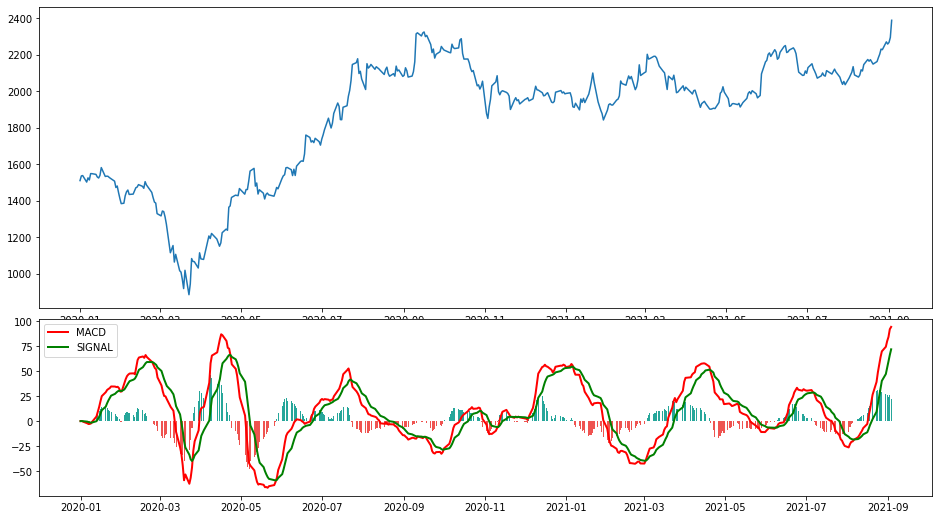

In [26]:
def plot_values(prices, macd, signal, hist):
    plt.figure(figsize=(16,9))
    ax1 = plt.subplot2grid((8,1), (0,0), rowspan = 5, colspan = 1)
    ax2 = plt.subplot2grid((8,1), (5,0), rowspan = 3, colspan = 1)
    
    ax1.plot(prices, label = 'PRICES')
    ax2.plot(macd, color = 'red', linewidth = 2, label = 'MACD')
    ax2.plot(signal, color = 'green', linewidth = 2, label = 'SIGNAL')

    for i in range(len(prices)):
        if str(hist[i])[0] == '-':
            ax2.bar(prices.index[i], hist[i], color = '#ef5350')
        else:
            ax2.bar(prices.index[i], hist[i], color = '#26a69a')

    plt.legend(loc = 'upper left')
    plt.show()

plot_values(rel['close'], df['macd'], df['signal'], df['hist'])


# 2. GRASIM INDUSTRIES LTD

In [8]:
gra = nse.get_hist('GRASIM',from_date = dt.datetime(2020,1,1),to_date = dt.datetime.now())
gra

,open,high,low,close,volume
Date,,,,,
2020-01-01,746.80,747.40,738.60,742.50,685313
2020-01-02,742.00,768.50,741.00,766.35,2413731
2020-01-03,769.95,769.95,751.50,756.65,1411458
2020-01-06,755.40,755.80,735.00,737.00,957541
2020-01-07,738.20,756.00,735.50,742.30,1104012
...,...,...,...,...,...
2021-08-30,1465.00,1483.00,1462.00,1471.15,764590
2021-08-31,1482.00,1504.40,1467.65,1500.40,1656264
2021-09-01,1510.00,1514.50,1480.20,1486.00,664026


In [9]:
def get_values(price,slow,fast,smooth):
    exp1 = price.ewm(span=fast, adjust=False).mean()
    exp2 = price.ewm(span=slow, adjust=False).mean()
    macd = exp1-exp2
    macd = pd.DataFrame(macd).rename(columns={'close':'macd'})
    signal = macd.ewm(span=smooth, adjust=False).mean()
    signal = pd.DataFrame(signal).rename(columns={'macd':'signal'})
    hist = macd['macd'] - signal['signal']
    hist = pd.DataFrame(hist).rename(columns={0:'hist'})
    df = pd.concat([macd,signal,hist],join='inner',axis=1)
    return df
df = get_values(gra['close'],26,12,9)
df

,macd,signal,hist
Date,,,
2020-01-01,0.000000,0.000000,0.000000
2020-01-02,1.902564,0.380513,1.522051
2020-01-03,2.597706,0.823951,1.773755
2020-01-06,1.545208,0.968203,0.577005
2020-01-07,1.125785,0.999719,0.126065
...,...,...,...
2021-08-30,-19.549861,-15.066087,-4.483774
2021-08-31,-15.954308,-15.243732,-0.710576
2021-09-01,-14.104181,-15.015821,0.911640


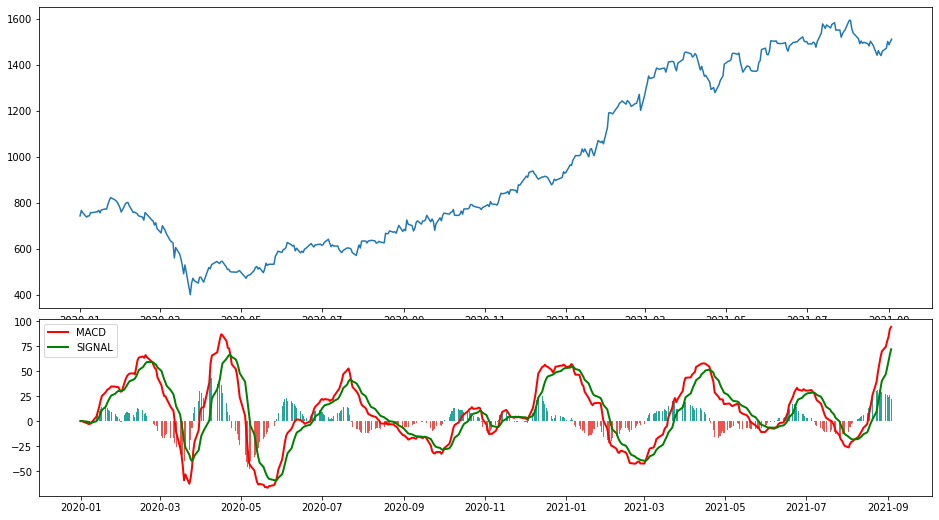

In [25]:
def plot_values(prices, macd, signal, hist):
    plt.figure(figsize=(16,9))
    ax1 = plt.subplot2grid((8,1), (0,0), rowspan = 5, colspan = 1)
    ax2 = plt.subplot2grid((8,1), (5,0), rowspan = 3, colspan = 1)
    
    ax1.plot(prices, label = 'PRICES')
    ax2.plot(macd, color = 'red', linewidth = 2, label = 'MACD')
    ax2.plot(signal, color = 'green', linewidth = 2, label = 'SIGNAL')

    for i in range(len(prices)):
        if str(hist[i])[0] == '-':
            ax2.bar(prices.index[i], hist[i], color = '#ef5350')
        else:
            ax2.bar(prices.index[i], hist[i], color = '#26a69a')

    plt.legend(loc = 'upper left')
    plt.show()

plot_values(gra['close'], df['macd'], df['signal'], df['hist'])


# 3. HINDUSTAN UNILEVER LIMITED

In [15]:
hul = nse.get_hist('HINDUNILVR',from_date = dt.datetime(2020,1,1),to_date = dt.datetime.now())
hul

,open,high,low,close,volume
Date,,,,,
2020-01-01,1930.00,1939.90,1918.00,1936.55,543035
2020-01-02,1940.00,1952.60,1930.00,1938.05,663275
2020-01-03,1937.90,1940.00,1918.75,1927.45,1598825
2020-01-06,1927.35,1929.40,1911.25,1915.45,683129
2020-01-07,1919.25,1931.00,1918.00,1920.70,808935
...,...,...,...,...,...
2021-08-30,2691.60,2705.75,2671.60,2687.70,1168190
2021-08-31,2687.90,2737.45,2675.65,2724.10,2535891
2021-09-01,2745.00,2775.00,2715.00,2732.90,1775792


In [17]:
def get_values(price,slow,fast,smooth):
    exp1 = price.ewm(span=fast, adjust=False).mean()
    exp2 = price.ewm(span=slow, adjust=False).mean()
    macd = exp1-exp2
    macd = pd.DataFrame(macd).rename(columns={'close':'macd'})
    signal = macd.ewm(span=smooth, adjust=False).mean()
    signal = pd.DataFrame(signal).rename(columns={'macd':'signal'})
    hist = macd['macd'] - signal['signal']
    hist = pd.DataFrame(hist).rename(columns={0:'hist'})
    df = pd.concat([macd,signal,hist],join='inner',axis=1)
    return df
df = get_values(hul['close'],26,12,9)
df

,macd,signal,hist
Date,,,
2020-01-01,0.000000,0.000000,0.000000
2020-01-02,0.119658,0.023932,0.095726
2020-01-03,-0.633540,-0.107563,-0.525978
2020-01-06,-2.173698,-0.520790,-1.652908
2020-01-07,-2.936800,-1.003992,-1.932808
...,...,...,...
2021-08-30,74.469112,47.157297,27.311815
2021-08-31,80.115505,53.748938,26.366566
2021-09-01,84.328313,59.864813,24.463500


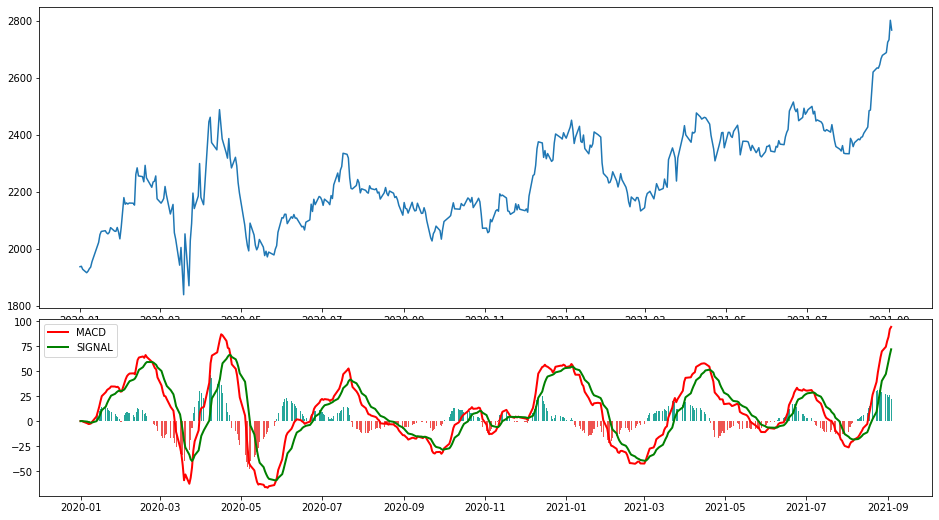

In [24]:
def plot_values(prices, macd, signal, hist):
    plt.figure(figsize=(16,9))
    ax1 = plt.subplot2grid((8,1), (0,0), rowspan = 5, colspan = 1)
    ax2 = plt.subplot2grid((8,1), (5,0), rowspan = 3, colspan = 1)
    
    ax1.plot(prices, label = 'PRICES')
    ax2.plot(macd, color = 'red', linewidth = 2, label = 'MACD')
    ax2.plot(signal, color = 'green', linewidth = 2, label = 'SIGNAL')

    for i in range(len(prices)):
        if str(hist[i])[0] == '-':
            ax2.bar(prices.index[i], hist[i], color = '#ef5350')
        else:
            ax2.bar(prices.index[i], hist[i], color = '#26a69a')

    plt.legend(loc = 'upper left')
    plt.show()

plot_values(hul['close'], df['macd'], df['signal'], df['hist'])


# 4. SHREE CEMENT LIMITED

In [27]:
scl = nse.get_hist('SHREECEM',from_date = dt.datetime(2020,1,1),to_date = dt.datetime.now())
scl

,open,high,low,close,volume
Date,,,,,
2020-01-01,20375.00,20489.00,20287.05,20319.90,4879
2020-01-02,20320.00,21279.90,20320.00,21232.15,31788
2020-01-03,21200.00,21398.95,20950.00,21122.25,19053
2020-01-06,21124.80,21219.95,20591.40,21064.40,25717
2020-01-07,21097.15,22050.00,20951.00,21963.15,83884
...,...,...,...,...,...
2021-08-30,26900.10,27420.00,26830.80,27157.85,41390
2021-08-31,27150.00,28469.00,27048.75,28287.90,102061
2021-09-01,28296.00,28600.00,27948.10,28478.25,75809


In [28]:
def get_values(price,slow,fast,smooth):
    exp1 = price.ewm(span=fast, adjust=False).mean()
    exp2 = price.ewm(span=slow, adjust=False).mean()
    macd = exp1-exp2
    macd = pd.DataFrame(macd).rename(columns={'close':'macd'})
    signal = macd.ewm(span=smooth, adjust=False).mean()
    signal = pd.DataFrame(signal).rename(columns={'macd':'signal'})
    hist = macd['macd'] - signal['signal']
    hist = pd.DataFrame(hist).rename(columns={0:'hist'})
    df = pd.concat([macd,signal,hist],join='inner',axis=1)
    return df
df = get_values(scl['close'],26,12,9)
df

,macd,signal,hist
Date,,,
2020-01-01,0.000000,0.000000,0.000000
2020-01-02,72.772080,14.554416,58.217664
2020-01-03,120.190979,35.681729,84.509250
2020-01-06,151.358026,58.816988,92.541038
2020-01-07,245.746931,96.202977,149.543954
...,...,...,...
2021-08-30,-368.115752,-415.877759,47.762006
2021-08-31,-217.372108,-376.176629,158.804521
2021-09-01,-81.606322,-317.262567,235.656245


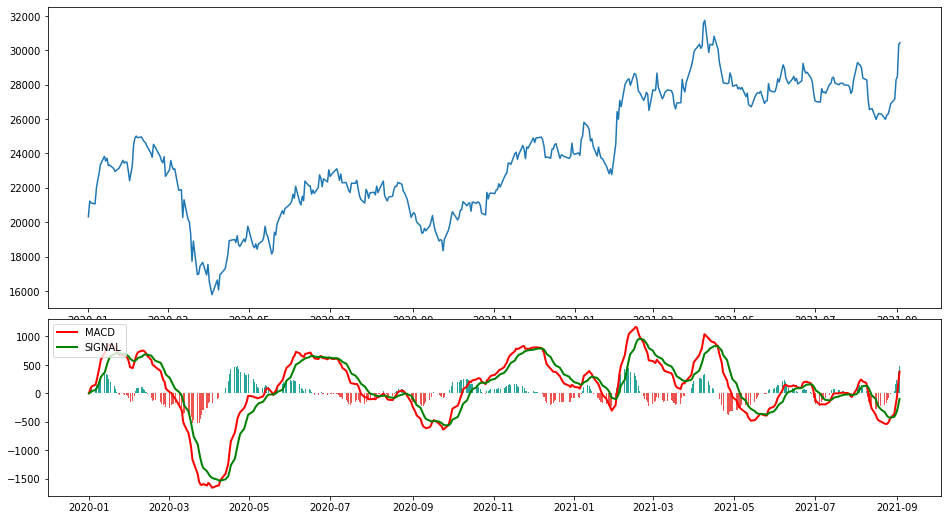

In [29]:
def plot_values(prices, macd, signal, hist):
    plt.figure(figsize=(16,9))
    ax1 = plt.subplot2grid((8,1), (0,0), rowspan = 5, colspan = 1)
    ax2 = plt.subplot2grid((8,1), (5,0), rowspan = 3, colspan = 1)
    
    ax1.plot(prices, label = 'PRICES')
    ax2.plot(macd, color = 'red', linewidth = 2, label = 'MACD')
    ax2.plot(signal, color = 'green', linewidth = 2, label = 'SIGNAL')

    for i in range(len(prices)):
        if str(hist[i])[0] == '-':
            ax2.bar(prices.index[i], hist[i], color = '#ef5350')
        else:
            ax2.bar(prices.index[i], hist[i], color = '#26a69a')

    plt.legend(loc = 'upper left')
    plt.show()

plot_values(scl['close'], df['macd'], df['signal'], df['hist'])


# 5. HCL TECHNOLOGIES LIMITED

In [30]:
hcl = nse.get_hist('HCLTECH',from_date = dt.datetime(2020,1,1),to_date = dt.datetime.now())
hcl

,open,high,low,close,volume
Date,,,,,
2020-01-01,569.40,572.90,566.85,571.95,918373
2020-01-02,572.55,575.00,570.50,573.55,1075642
2020-01-03,574.00,588.50,572.85,585.05,3269446
2020-01-06,585.00,592.20,579.45,582.00,3589985
2020-01-07,582.00,587.75,579.05,584.25,3179728
...,...,...,...,...,...
2021-08-30,1164.00,1170.35,1154.55,1163.40,2956868
2021-08-31,1166.00,1193.40,1162.05,1182.30,7199002
2021-09-01,1190.00,1190.50,1161.75,1164.65,3200410


In [31]:
def get_values(price,slow,fast,smooth):
    exp1 = price.ewm(span=fast, adjust=False).mean()
    exp2 = price.ewm(span=slow, adjust=False).mean()
    macd = exp1-exp2
    macd = pd.DataFrame(macd).rename(columns={'close':'macd'})
    signal = macd.ewm(span=smooth, adjust=False).mean()
    signal = pd.DataFrame(signal).rename(columns={'macd':'signal'})
    hist = macd['macd'] - signal['signal']
    hist = pd.DataFrame(hist).rename(columns={0:'hist'})
    df = pd.concat([macd,signal,hist],join='inner',axis=1)
    return df
df = get_values(hcl['close'],26,12,9)
df

,macd,signal,hist
Date,,,
2020-01-01,0.000000,0.000000,0.000000
2020-01-02,0.127635,0.025527,0.102108
2020-01-03,1.143559,0.249133,0.894425
2020-01-06,1.683174,0.535941,1.147232
2020-01-07,2.266254,0.882004,1.384250
...,...,...,...
2021-08-30,40.717719,37.508433,3.209286
2021-08-31,41.369035,38.280553,3.088482
2021-09-01,39.999906,38.624424,1.375482


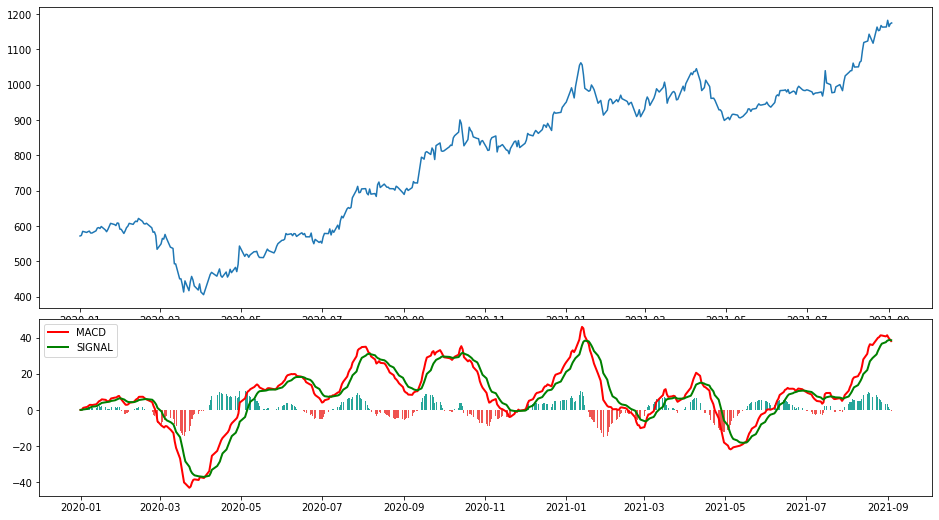

In [32]:
def plot_values(prices, macd, signal, hist):
    plt.figure(figsize=(16,9))
    ax1 = plt.subplot2grid((8,1), (0,0), rowspan = 5, colspan = 1)
    ax2 = plt.subplot2grid((8,1), (5,0), rowspan = 3, colspan = 1)
    
    ax1.plot(prices, label = 'PRICES')
    ax2.plot(macd, color = 'red', linewidth = 2, label = 'MACD')
    ax2.plot(signal, color = 'green', linewidth = 2, label = 'SIGNAL')

    for i in range(len(prices)):
        if str(hist[i])[0] == '-':
            ax2.bar(prices.index[i], hist[i], color = '#ef5350')
        else:
            ax2.bar(prices.index[i], hist[i], color = '#26a69a')

    plt.legend(loc = 'upper left')
    plt.show()

plot_values(hcl['close'], df['macd'], df['signal'], df['hist'])


# 6. IDEA

In [33]:
idea = nse.get_hist('IDEA',from_date = dt.datetime(2020,1,1),to_date = dt.datetime.now())
idea

,open,high,low,close,volume
Date,,,,,
2020-01-01,6.20,6.30,6.00,6.10,55777825
2020-01-02,6.00,6.20,5.95,6.10,67004549
2020-01-03,6.10,6.20,6.00,6.10,77256216
2020-01-06,6.05,6.10,5.90,6.00,65911114
2020-01-07,6.00,6.20,5.90,6.00,85292839
...,...,...,...,...,...
2021-08-30,6.05,6.10,5.90,5.95,84925689
2021-08-31,5.95,6.40,5.85,6.10,298905204
2021-09-01,6.05,6.35,6.00,6.10,278532142


In [35]:
def get_values(price,slow,fast,smooth):
    exp1 = price.ewm(span=fast, adjust=False).mean()
    exp2 = price.ewm(span=slow, adjust=False).mean()
    macd = exp1-exp2
    macd = pd.DataFrame(macd).rename(columns={'close':'macd'})
    signal = macd.ewm(span=smooth, adjust=False).mean()
    signal = pd.DataFrame(signal).rename(columns={'macd':'signal'})
    hist = macd['macd'] - signal['signal']
    hist = pd.DataFrame(hist).rename(columns={0:'hist'})
    df = pd.concat([macd,signal,hist],join='inner',axis=1)
    return df
df = get_values(idea['close'],26,12,9)
df

,macd,signal,hist
Date,,,
2020-01-01,0.000000,0.000000,0.000000
2020-01-02,0.000000,0.000000,0.000000
2020-01-03,0.000000,0.000000,0.000000
2020-01-06,-0.007977,-0.001595,-0.006382
2020-01-07,-0.014136,-0.004104,-0.010033
...,...,...,...
2021-08-30,-0.594791,-0.646916,0.052125
2021-08-31,-0.560753,-0.629684,0.068931
2021-09-01,-0.527695,-0.609286,0.081591


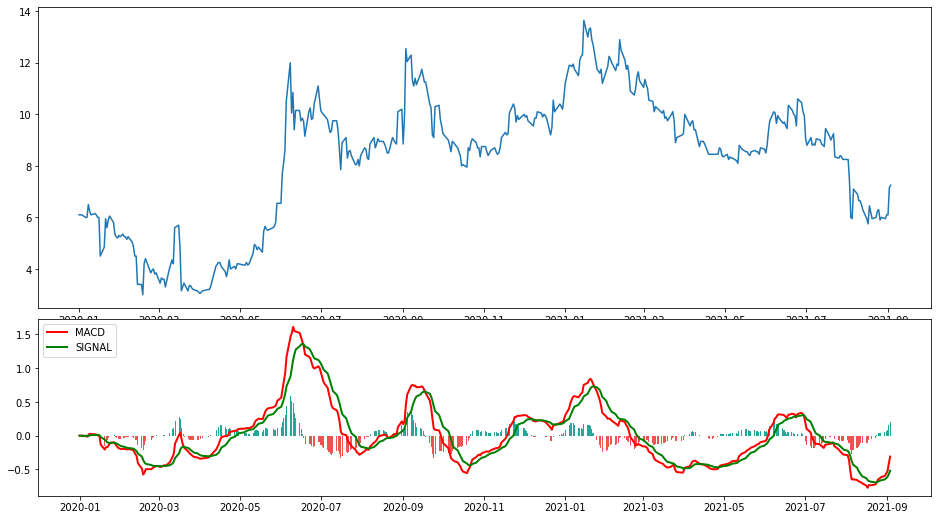

In [36]:
def plot_values(prices, macd, signal, hist):
    plt.figure(figsize=(16,9))
    ax1 = plt.subplot2grid((8,1), (0,0), rowspan = 5, colspan = 1)
    ax2 = plt.subplot2grid((8,1), (5,0), rowspan = 3, colspan = 1)
    
    ax1.plot(prices, label = 'PRICES')
    ax2.plot(macd, color = 'red', linewidth = 2, label = 'MACD')
    ax2.plot(signal, color = 'green', linewidth = 2, label = 'SIGNAL')

    for i in range(len(prices)):
        if str(hist[i])[0] == '-':
            ax2.bar(prices.index[i], hist[i], color = '#ef5350')
        else:
            ax2.bar(prices.index[i], hist[i], color = '#26a69a')

    plt.legend(loc = 'upper left')
    plt.show()

plot_values(idea['close'], df['macd'], df['signal'], df['hist'])


# 7. NATIONAL ALUMINIUM COMPANY LIMITED

In [39]:
alu = nse.get_hist('NATIONALUM',from_date = dt.datetime(2020,1,1),to_date = dt.datetime.now())
alu

,open,high,low,close,volume
Date,,,,,
2020-01-01,43.70,44.05,42.85,43.20,8132650
2020-01-02,43.30,46.25,43.10,45.95,20691143
2020-01-03,45.95,46.65,45.15,45.65,11015257
2020-01-06,45.00,45.60,43.50,43.70,10941075
2020-01-07,44.05,45.05,43.45,44.05,8924256
...,...,...,...,...,...
2021-08-30,85.45,89.00,85.00,87.95,61988978
2021-08-31,87.85,91.00,86.85,90.75,59439489
2021-09-01,91.00,91.55,87.90,88.50,36369489


In [40]:
def get_values(price,slow,fast,smooth):
    exp1 = price.ewm(span=fast, adjust=False).mean()
    exp2 = price.ewm(span=slow, adjust=False).mean()
    macd = exp1-exp2
    macd = pd.DataFrame(macd).rename(columns={'close':'macd'})
    signal = macd.ewm(span=smooth, adjust=False).mean()
    signal = pd.DataFrame(signal).rename(columns={'macd':'signal'})
    hist = macd['macd'] - signal['signal']
    hist = pd.DataFrame(hist).rename(columns={0:'hist'})
    df = pd.concat([macd,signal,hist],join='inner',axis=1)
    return df
df = get_values(alu['close'],26,12,9)
df

,macd,signal,hist
Date,,,
2020-01-01,0.000000,0.000000,0.000000
2020-01-02,0.219373,0.043875,0.175499
2020-01-03,0.364815,0.108063,0.256752
2020-01-06,0.319053,0.150261,0.168792
2020-01-07,0.307483,0.181705,0.125778
...,...,...,...
2021-08-30,-0.593063,-0.755921,0.162859
2021-08-31,0.113790,-0.581979,0.695769
2021-09-01,0.486808,-0.368222,0.855029


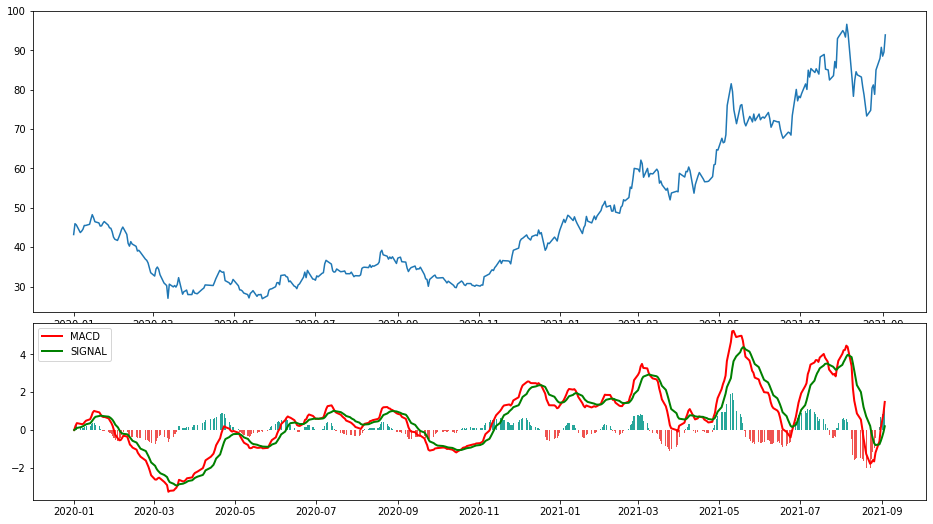

In [41]:
def plot_values(prices, macd, signal, hist):
    plt.figure(figsize=(16,9))
    ax1 = plt.subplot2grid((8,1), (0,0), rowspan = 5, colspan = 1)
    ax2 = plt.subplot2grid((8,1), (5,0), rowspan = 3, colspan = 1)
    
    ax1.plot(prices, label = 'PRICES')
    ax2.plot(macd, color = 'red', linewidth = 2, label = 'MACD')
    ax2.plot(signal, color = 'green', linewidth = 2, label = 'SIGNAL')

    for i in range(len(prices)):
        if str(hist[i])[0] == '-':
            ax2.bar(prices.index[i], hist[i], color = '#ef5350')
        else:
            ax2.bar(prices.index[i], hist[i], color = '#26a69a')

    plt.legend(loc = 'upper left')
    plt.show()

plot_values(alu['close'], df['macd'], df['signal'], df['hist'])


# 8. STEEL AUTHORITY OF INDIA LIMITED

In [44]:
sail = nse.get_hist('SAIL',from_date = dt.datetime(2020,1,1),to_date = dt.datetime.now())
sail

,open,high,low,close,volume
Date,,,,,
2020-01-01,43.15,43.50,42.55,42.90,24324562
2020-01-02,44.00,47.60,43.70,47.25,90919639
2020-01-03,46.70,47.55,46.20,46.65,35905086
2020-01-06,46.30,46.40,44.60,44.80,26273422
2020-01-07,45.50,46.30,44.85,45.50,26593985
...,...,...,...,...,...
2021-08-30,118.85,122.80,118.80,121.50,43152497
2021-08-31,122.25,122.90,120.05,121.60,31984469
2021-09-01,121.40,121.60,118.30,120.05,29172329


In [45]:
def get_values(price,slow,fast,smooth):
    exp1 = price.ewm(span=fast, adjust=False).mean()
    exp2 = price.ewm(span=slow, adjust=False).mean()
    macd = exp1-exp2
    macd = pd.DataFrame(macd).rename(columns={'close':'macd'})
    signal = macd.ewm(span=smooth, adjust=False).mean()
    signal = pd.DataFrame(signal).rename(columns={'macd':'signal'})
    hist = macd['macd'] - signal['signal']
    hist = pd.DataFrame(hist).rename(columns={0:'hist'})
    df = pd.concat([macd,signal,hist],join='inner',axis=1)
    return df
df = get_values(sail['close'],26,12,9)
df

,macd,signal,hist
Date,,,
2020-01-01,0.000000,0.000000,0.000000
2020-01-02,0.347009,0.069402,0.277607
2020-01-03,0.567064,0.168934,0.398129
2020-01-06,0.585431,0.252233,0.333197
2020-01-07,0.648990,0.331585,0.317405
...,...,...,...
2021-08-30,-3.494292,-1.920581,-1.573712
2021-08-31,-3.351245,-2.206714,-1.144532
2021-09-01,-3.324627,-2.430296,-0.894331


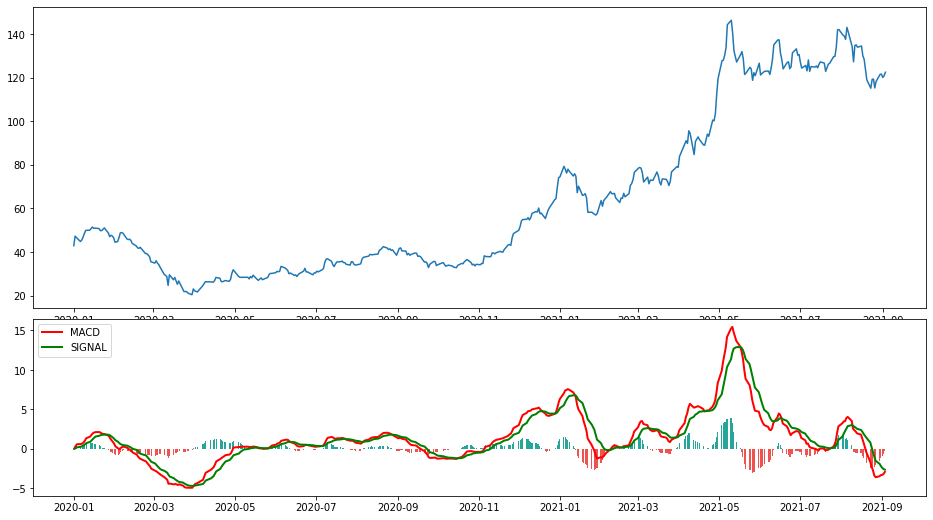

In [46]:
def plot_values(prices, macd, signal, hist):
    plt.figure(figsize=(16,9))
    ax1 = plt.subplot2grid((8,1), (0,0), rowspan = 5, colspan = 1)
    ax2 = plt.subplot2grid((8,1), (5,0), rowspan = 3, colspan = 1)
    
    ax1.plot(prices, label = 'PRICES')
    ax2.plot(macd, color = 'red', linewidth = 2, label = 'MACD')
    ax2.plot(signal, color = 'green', linewidth = 2, label = 'SIGNAL')

    for i in range(len(prices)):
        if str(hist[i])[0] == '-':
            ax2.bar(prices.index[i], hist[i], color = '#ef5350')
        else:
            ax2.bar(prices.index[i], hist[i], color = '#26a69a')

    plt.legend(loc = 'upper left')
    plt.show()

plot_values(sail['close'], df['macd'], df['signal'], df['hist'])


# 9. PUNJAB NATIONAL BANK

In [47]:
pnb = nse.get_hist('PNB',from_date = dt.datetime(2020,1,1),to_date = dt.datetime.now())
pnb

,open,high,low,close,volume
Date,,,,,
2020-01-01,64.50,65.05,63.95,64.70,8568946
2020-01-02,65.00,67.00,64.55,66.70,26059066
2020-01-03,66.55,66.55,64.60,65.05,14906983
2020-01-06,64.90,64.90,61.00,61.40,24078755
2020-01-07,62.10,63.10,61.00,61.85,20436567
...,...,...,...,...,...
2021-08-30,36.15,36.90,36.15,36.75,31585995
2021-08-31,36.65,37.30,36.35,36.65,56641931
2021-09-01,36.60,37.45,36.55,37.35,41504907


In [48]:
def get_values(price,slow,fast,smooth):
    exp1 = price.ewm(span=fast, adjust=False).mean()
    exp2 = price.ewm(span=slow, adjust=False).mean()
    macd = exp1-exp2
    macd = pd.DataFrame(macd).rename(columns={'close':'macd'})
    signal = macd.ewm(span=smooth, adjust=False).mean()
    signal = pd.DataFrame(signal).rename(columns={'macd':'signal'})
    hist = macd['macd'] - signal['signal']
    hist = pd.DataFrame(hist).rename(columns={0:'hist'})
    df = pd.concat([macd,signal,hist],join='inner',axis=1)
    return df
df = get_values(pnb['close'],26,12,9)
df

,macd,signal,hist
Date,,,
2020-01-01,0.000000,0.000000,0.000000
2020-01-02,0.159544,0.031909,0.127635
2020-01-03,0.151101,0.055747,0.095354
2020-01-06,-0.148404,0.014917,-0.163321
2020-01-07,-0.345470,-0.057160,-0.288310
...,...,...,...
2021-08-30,-1.005825,-1.006679,0.000854
2021-08-31,-0.940695,-0.993482,0.052787
2021-09-01,-0.823108,-0.959407,0.136300


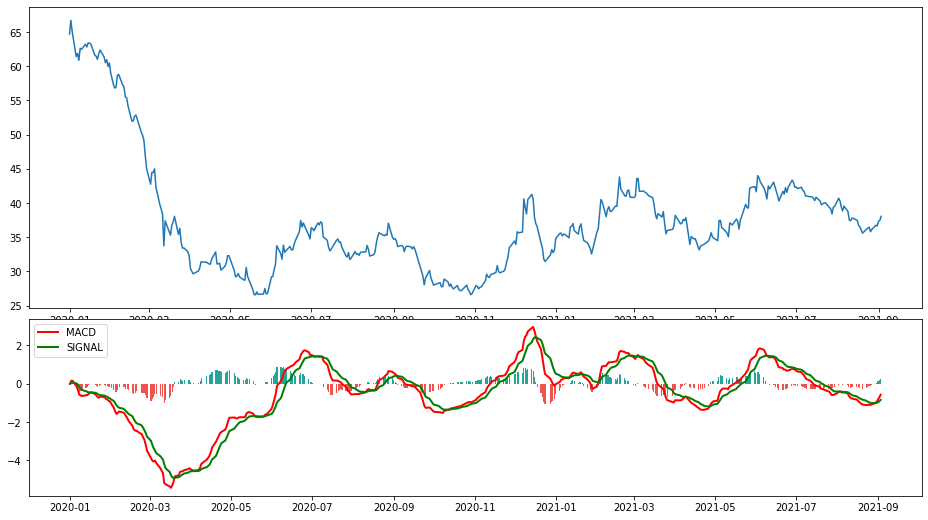

In [49]:
def plot_values(prices, macd, signal, hist):
    plt.figure(figsize=(16,9))
    ax1 = plt.subplot2grid((8,1), (0,0), rowspan = 5, colspan = 1)
    ax2 = plt.subplot2grid((8,1), (5,0), rowspan = 3, colspan = 1)
    
    ax1.plot(prices, label = 'PRICES')
    ax2.plot(macd, color = 'red', linewidth = 2, label = 'MACD')
    ax2.plot(signal, color = 'green', linewidth = 2, label = 'SIGNAL')

    for i in range(len(prices)):
        if str(hist[i])[0] == '-':
            ax2.bar(prices.index[i], hist[i], color = '#ef5350')
        else:
            ax2.bar(prices.index[i], hist[i], color = '#26a69a')

    plt.legend(loc = 'upper left')
    plt.show()

plot_values(pnb['close'], df['macd'], df['signal'], df['hist'])


# 10. YES BANK

In [50]:
yes = nse.get_hist('YESBANK',from_date = dt.datetime(2020,1,1),to_date = dt.datetime.now())
yes

,open,high,low,close,volume
Date,,,,,
2020-01-01,46.95,47.50,46.50,46.65,102291841
2020-01-02,46.80,48.50,46.40,47.35,122242838
2020-01-03,47.35,48.25,46.85,47.10,94827592
2020-01-06,46.75,46.75,45.00,45.15,102880221
2020-01-07,45.70,46.40,43.95,45.05,111094678
...,...,...,...,...,...
2021-08-30,11.15,11.15,10.80,10.90,115836903
2021-08-31,10.90,11.00,10.75,10.80,89884569
2021-09-01,10.80,11.40,10.75,11.10,151330531


In [51]:
def get_values(price,slow,fast,smooth):
    exp1 = price.ewm(span=fast, adjust=False).mean()
    exp2 = price.ewm(span=slow, adjust=False).mean()
    macd = exp1-exp2
    macd = pd.DataFrame(macd).rename(columns={'close':'macd'})
    signal = macd.ewm(span=smooth, adjust=False).mean()
    signal = pd.DataFrame(signal).rename(columns={'macd':'signal'})
    hist = macd['macd'] - signal['signal']
    hist = pd.DataFrame(hist).rename(columns={0:'hist'})
    df = pd.concat([macd,signal,hist],join='inner',axis=1)
    return df
df = get_values(yes['close'],26,12,9)
df

,macd,signal,hist
Date,,,
2020-01-01,0.000000,0.000000,0.000000
2020-01-02,0.055840,0.011168,0.044672
2020-01-03,0.079011,0.024737,0.054274
2020-01-06,-0.059292,0.007931,-0.067223
2020-01-07,-0.174950,-0.028645,-0.146305
...,...,...,...
2021-08-30,-0.556844,-0.519059,-0.037785
2021-08-31,-0.554171,-0.526082,-0.028090
2021-09-01,-0.521830,-0.525231,0.003401


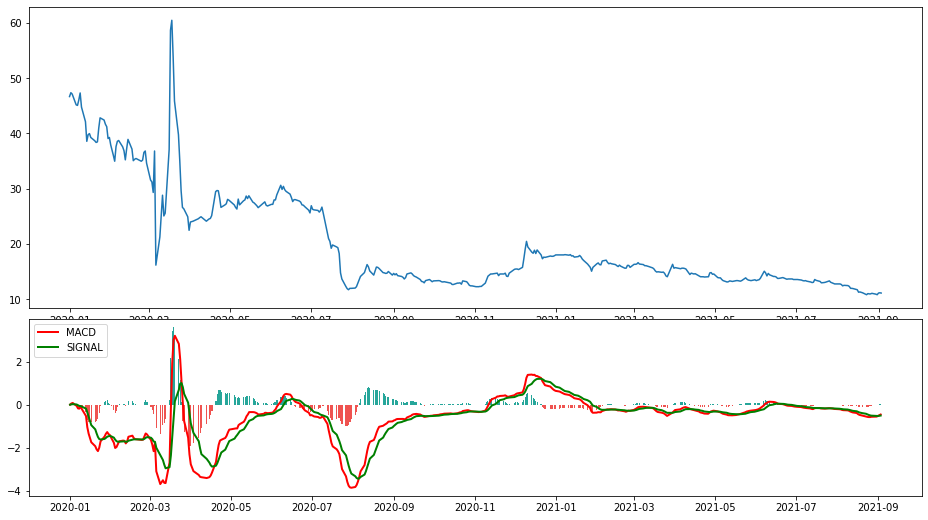

In [52]:
def plot_values(prices, macd, signal, hist):
    plt.figure(figsize=(16,9))
    ax1 = plt.subplot2grid((8,1), (0,0), rowspan = 5, colspan = 1)
    ax2 = plt.subplot2grid((8,1), (5,0), rowspan = 3, colspan = 1)
    
    ax1.plot(prices, label = 'PRICES')
    ax2.plot(macd, color = 'red', linewidth = 2, label = 'MACD')
    ax2.plot(signal, color = 'green', linewidth = 2, label = 'SIGNAL')

    for i in range(len(prices)):
        if str(hist[i])[0] == '-':
            ax2.bar(prices.index[i], hist[i], color = '#ef5350')
        else:
            ax2.bar(prices.index[i], hist[i], color = '#26a69a')

    plt.legend(loc = 'upper left')
    plt.show()

plot_values(yes['close'], df['macd'], df['signal'], df['hist'])
